##  Muhammad Khaifa Gifari - 1301170382

In [1]:
#Import library
import pandas as pd
import numpy as np
import random
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# TASK I [CLASSIFICATION]

### Load dataset

In [2]:
df = pd.read_csv('used_cars.csv', index_col = 0)

## 1) Problem Understanding


Pada kasus ini, mahasiswa diberikan sebuah dataset yang berasal dari dosen machine learning.
Dataset yang diterima adalah dataset Used_cars. Dataset ini berisi data-data mobil bekas yang masing-masing mobil mempunyai atribut id, url, region, dll. Mahasiswa diminta menyelesaikan task classification terhadap dataset used cars ini.

Berdasarkan pengamatan kasar terhadap dataset, maka saya akan memutuskan untuk membuat model Klasifikasi harga mobil.

## 2) Data Exploration

Sebelum memodelkan alangkah baiknya kita mengetahui karakteristik dari masing-masing data.
Berikut adalah data data dataset used cars.

In [3]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


### Dimensional reduction

Karena beberapa fitur tidak berpengaruh terhadap label. Contoh: kolom id, image_url, dll tidak akan berpengaruh terhadap harga dari mobil.

Maka kita drop fitur-fitur yang tidak diperlukan.

In [4]:
#delete kolom yang tidak perlu/dimensional reduction 
drop_columns = ['id', 'url','region', 'vin', 'lat', 'long', 'state', 'county', 'description', 'image_url', 'region_url']
df = df.drop(drop_columns, axis=1) 
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,compact,hatchback,black
1,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,4wd,NaN,NaN,NaN
2,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,4wd,NaN,NaN,white
3,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,4wd,NaN,NaN,NaN
4,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,4wd,NaN,pickup,white


In [5]:
pp.ProfileReport(df)

Number of variables,14
Number of observations,20001
Total Missing (%),16.8%
Total size in memory,2.3 MiB
Average record size in memory,120.0 B
Numeric,3
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Berdasarkan pandas profiling report masih banyak value yg missing.

Terutama pada label 'price', masih banyak data dengan value = 0. Maka dari itu perlu dilakukan penghapusan row data dengan price = 0.

### Cleaning data

Jika kita lihat secara kasar pada head dataset diatas, terdapat beberapa value yang nilainya null/NaN. Agar lebih detil, maka kita jumlahkan nilai null pada setiap kolom dataset.

### Missing value
Jika kita lihat secara kasar pada head dataset diatas, terdapat beberapa value yang nilainya null/NaN. Agar lebih detil, maka kita jumlahkan nilai null pada setiap kolom dataset.

In [6]:
df.isna().sum()

price               0
year               12
manufacturer      705
model             265
condition        9152
cylinders        7085
fuel               73
odometer         2389
title_status      110
transmission      190
drive            4642
size            13115
type             3659
paint_color      5514
dtype: int64

### Handling missing value

Ternyata banyak sekali fitur-fitur yang missing-value. Solusinya:
##### 1) Drop data/hapus row ( ini yang akan digunakan )
###### 2) Replace with mean/modus/median
###### 3) Modelling

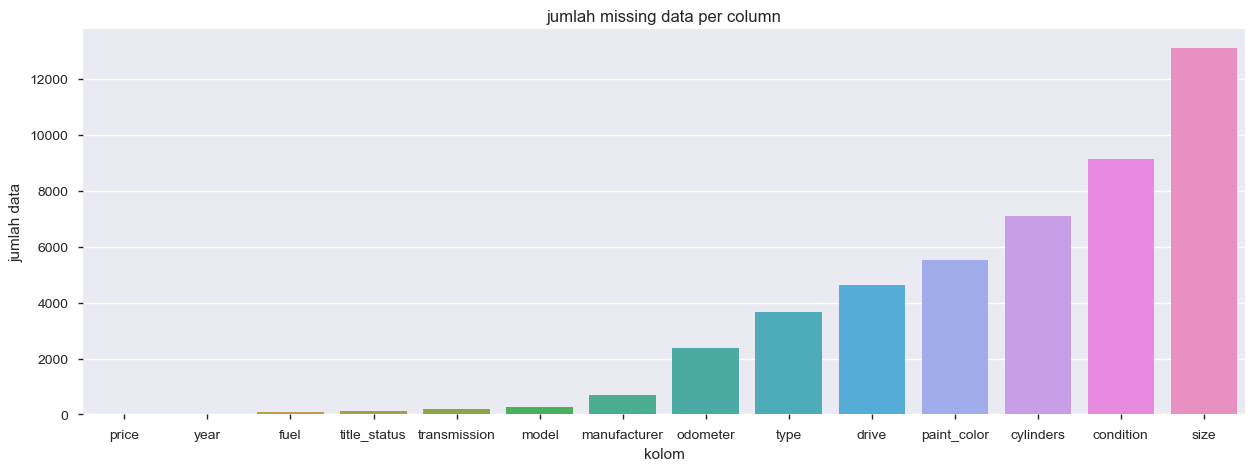

In [7]:
#look at missing data
nans = df.isnull().sum().sort_values(ascending=True)
plt.figure(figsize=(15,5))
plt.xlabel('kolom')
plt.ylabel('jumlah data')
sns.barplot(x=nans.index, y=nans.values)
plt.title("jumlah missing data per column")
plt.show()

Berdasarkan grafik penyebaran missing-value pada masing-masing fitur, diperoleh fitur 'size' memiliki jumlah miss-value
paling banyak, sebanyak > 10000 data.

Jumlahnya lebih dari setengah jumlah seluruh dataset, maka dari itu saya akan drop fitur tersebut agar tidak mempengaruhi model nantinya.

In [8]:
df.drop(columns = 'size', inplace = True)
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,hatchback,black
1,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,4wd,NaN,NaN
2,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,4wd,NaN,white
3,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,4wd,NaN,NaN
4,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,4wd,pickup,white


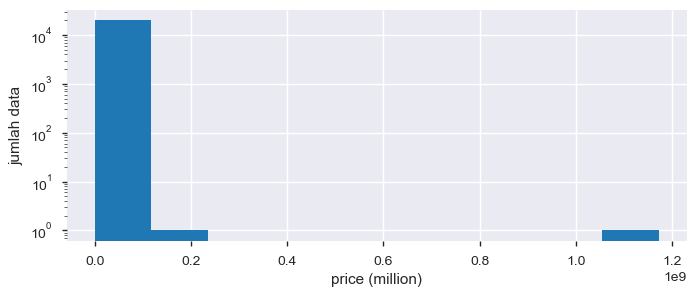

In [9]:
plt.figure(figsize=(8,3))
plt.xlabel('price (million)')
plt.ylabel('jumlah data')
df['price'].hist(bins = 10, log = True)


Terdapat outlier data, yaitu harga mobil yang sangat mahal, seharga $1172420096. Tentu kita akan menghapus data tersebut.

In [10]:
print(sum(df['price'] == 0)) #jumlah data dengan price = 0.

2488


Masih banyak data mobil yang harganya $0. Tentu saja ini tidak mungkin karena tidak ada harga mobil yang dijual dengan 0 atau gratis.
Maka dari itu saya akan potong data price dari 20 < price < 200000.

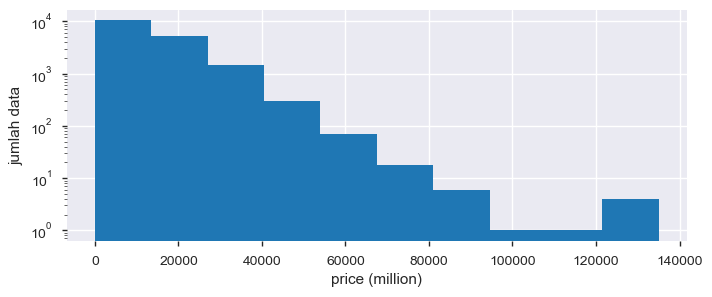

In [11]:
df = df[df['price'].between(20, 200000)]
plt.figure(figsize=(8,3))
plt.xlabel('price (million)')
plt.ylabel('jumlah data')
df['price'].hist(bins = 10, log = True)

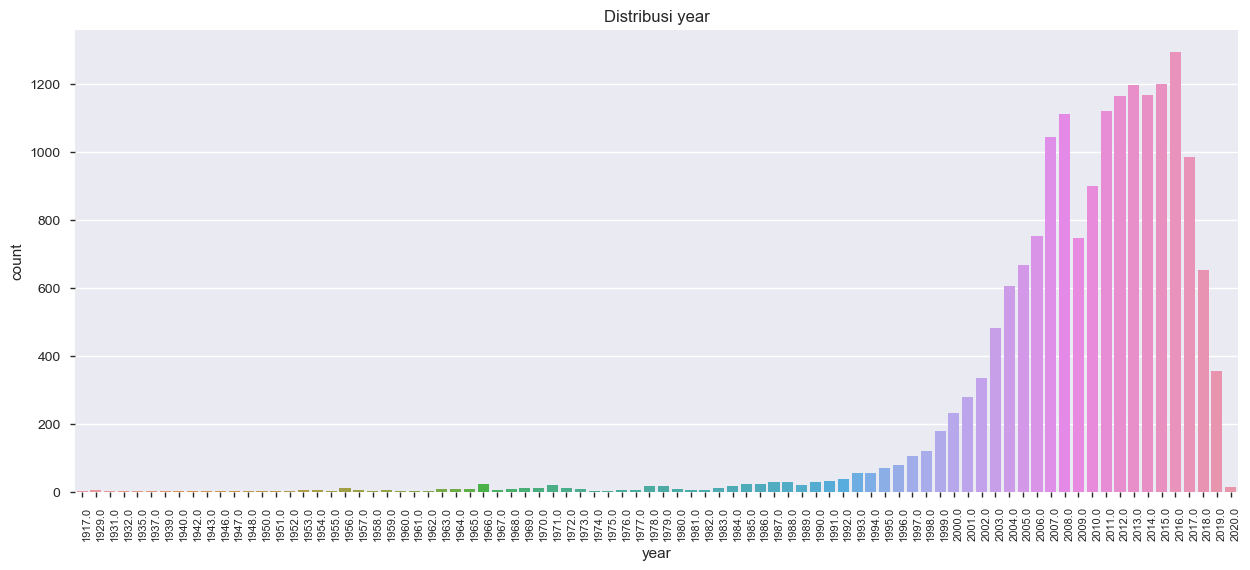

In [12]:
plt.figure(figsize=(15,6))
plt.title('Distribusi year')
ax = sns.countplot(x='year',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left",fontsize=8);

Penyebaran data mobil bekas terlihat signifikan pada saat tahun 1990 keatas.
Mobil tertua pabrikan tahun 1917, dan mobil terbaru pabrikan 2020.
Dengan mobil bekas pabrikan tahun 2016 yang paling banyak pada dataset ini.

## Distribusi harga mobil 10 tahun terakhir

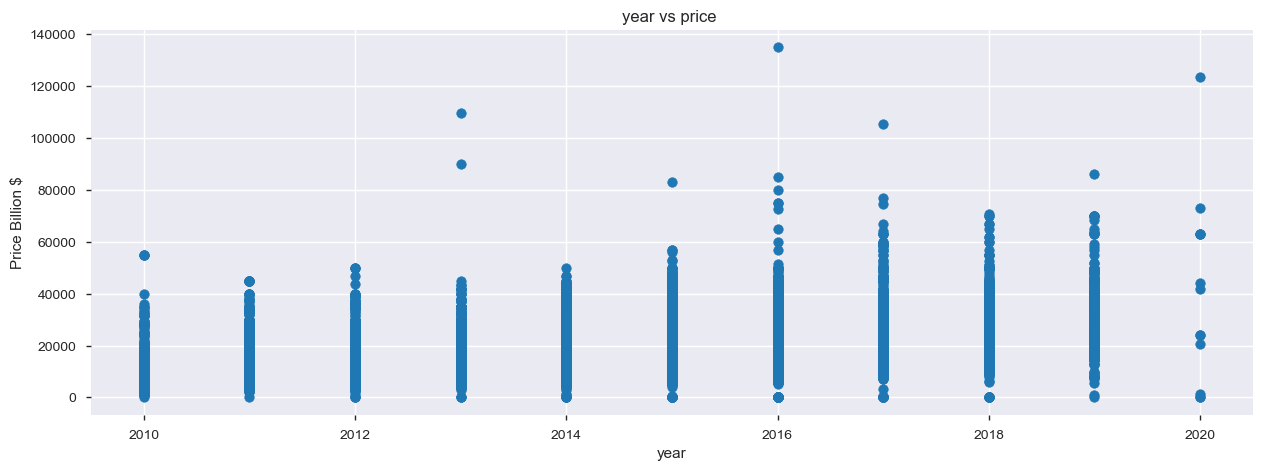

In [13]:
pricecar = df[['year','price']]
pricechange = pricecar[pricecar['year']>=2010]
plt.figure(figsize=(15,5))
plt.scatter(pricechange['year'], pricechange['price'])
plt.title('year vs price ')
plt.xlabel('year')
plt.ylabel('Price Billion $')
plt.show()

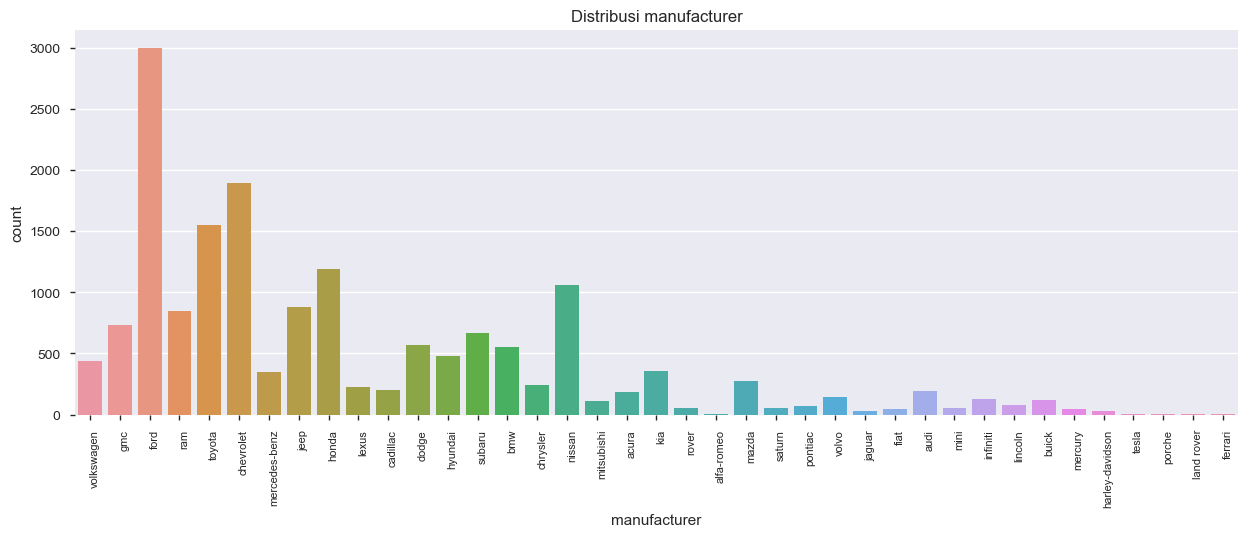

In [14]:
plt.figure(figsize=(15,5))
plt.title('Distribusi manufacturer')
ax = sns.countplot(x='manufacturer',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left",fontsize=8);

Sementara untuk pabrik manufaktur, mobil bekas didominasi oleh manufaktur FORD dengan lebih dari 3000 data.

# Experimen

Untuk experimen terhadap model nanti, saya akan menggunakan dua data dengan metode preparation yang berbeda.

Data ke-1 (df), adalah data dengan proses preparation tanpa menghapus seluruh row yang terdapat missing value, namun dengan menggantinya dengan Modus (data terbanyak muncul) .
Data ke-2 (df1), adalah data dengan proses cleaning data, menghapus seluruh row yang terdapat missing value.

In [15]:
df1 = df.copy()
df1 = df1.dropna()


# Feature engineering

encoding categorical feature

In [16]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,hatchback,black
2,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,4wd,NaN,white
4,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,4wd,pickup,white
5,13999,2009.0,ram,NaN,NaN,NaN,gas,120057.0,clean,automatic,4wd,pickup,silver
6,34500,2017.0,ford,f-350,NaN,NaN,diesel,95484.0,clean,automatic,4wd,pickup,white


In [17]:
# Determination categorical features
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
features = df.columns.tolist()
categorical_features = []
for column in features:
    if (df[column].dtype in numerics) : continue
    else : categorical_features.append(column)

for column in categorical_features:
    mode = df[column].mode()
    df[column] = df[column].fillna(df[column].mode()[0])
    le = LabelEncoder()
    le.fit(list(df[column].astype(str).values))
    df[column] = le.transform(list(df[column].astype(str).values))

df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,17899,2012.0,37,2136,0,3,2,63500.0,0,1,0,4,0
2,46463,2015.0,12,3206,0,5,2,7554.0,0,0,0,9,10
4,49999,2018.0,11,1791,0,5,0,70150.0,0,0,0,8,10
5,13999,2009.0,31,1713,0,5,2,120057.0,0,0,0,8,9
6,34500,2017.0,11,1768,0,5,0,95484.0,0,0,0,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,24999,2017.0,34,3914,0,5,2,29894.0,0,1,0,9,9
19996,49999,2016.0,31,1333,0,5,0,43406.0,0,0,0,10,5
19997,12127,2018.0,28,3164,0,3,2,32867.0,0,0,1,9,10
19999,14661,2017.0,36,1230,0,3,2,30486.0,0,0,1,9,10


In [18]:
# Determination categorical features

numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
features = df1.columns.tolist()
categorical_features = []
for column in features:
    if (df1[column].dtype in numerics) : continue
    else : categorical_features.append(column)

for column in categorical_features:
    mode = df1[column].mode()
    df1[column] = df1[column].fillna(df1[column].mode()[0])
    le = LabelEncoder()
    le.fit(list(df1[column].astype(str).values))
    df1[column] = le.transform(list(df1[column].astype(str).values))

df1

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,17899,2012.0,34,968,0,3,2,63500.0,0,1,0,4,0
24,4600,2008.0,13,426,2,3,2,110982.0,0,0,1,9,5
48,28000,2004.0,10,856,2,0,2,67348.0,0,0,0,10,10
52,18999,2015.0,22,453,0,3,2,37000.0,0,0,1,9,10
53,79997,2016.0,22,257,0,6,2,28000.0,0,0,2,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19920,3900,2006.0,6,1778,0,5,2,184000.0,0,0,0,0,5
19927,11995,2017.0,31,1034,3,3,2,35050.0,3,0,0,12,1
19944,18995,2019.0,17,417,0,3,2,4100.0,0,0,1,0,4
19961,11500,2017.0,13,432,3,3,2,27415.0,3,0,1,9,1


In [19]:
df.odometer.isna().sum()

2106

Value dari categorical feature di encode menjadi numerical value

In [20]:
df = df[df['year'] > 1917]
odo_mean = round(df['odometer'].mean())
df['odometer'].fillna(odo_mean, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17468 entries, 0 to 20000
Data columns (total 13 columns):
price           17468 non-null int64
year            17468 non-null float64
manufacturer    17468 non-null int64
model           17468 non-null int64
condition       17468 non-null int64
cylinders       17468 non-null int64
fuel            17468 non-null int64
odometer        17468 non-null float64
title_status    17468 non-null int64
transmission    17468 non-null int64
drive           17468 non-null int64
type            17468 non-null int64
paint_color     17468 non-null int64
dtypes: float64(2), int64(11)
memory usage: 1.9 MB


In [21]:
df['year'] = (df['year']).astype('int64')
df['odometer'] = (df['odometer'].astype('int64'))
# pp.ProfileReport(df)

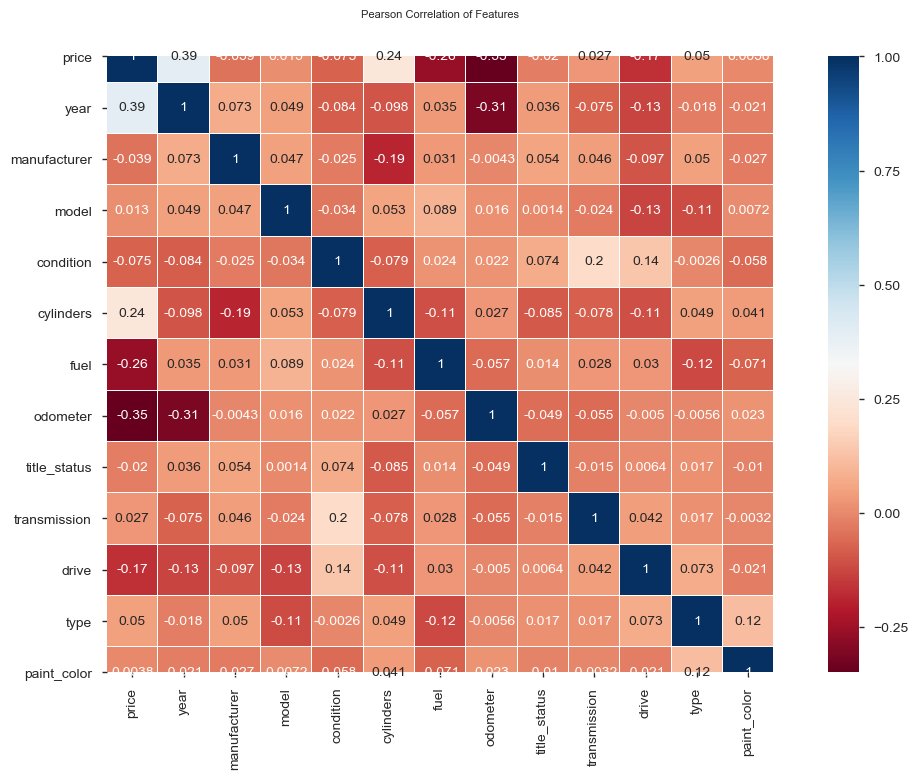

In [22]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,8))
plt.title('Pearson Correlation of Features', y=1.05, size=8)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Data Splitting

## Experimen 1 : Data tanpa drop null values dengan klasifikasi sebanyak 10 kelas. n = 10.

In [23]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, df.columns != 'price'].values, df.iloc[:, df.columns == 'price'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 1)

In [24]:
# convert price data to classes
n_classes = 10

y_classes = np.linspace(0, y.max(), n_classes)
y_train_cl = np.digitize(y_train, bins=y_classes)
y_test_cl = np.digitize(y_test, bins=y_classes)

print('Price classes: %s' % (np.round(y_classes)))

Price classes: [     0.  15000.  30000.  45000.  60000.  75000.  90000. 105000. 120000.
 135000.]


# Data Modelling
Terdapat 4 buah model algoritma klasifikasi yang ingin diuji, yaitu:

1) Decission Tree

2) Random Forest Classifier

In [25]:
# test different models on the data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [
          ('Decission Tree', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier())
         ]

### Cross Validation - KFolds
Sebelum model experimen1 diuji akan dilakukan cross validation, dengan k = 10.

In [26]:
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train_cl, cv=kfold)    
    results.append(cv_results)
    names.append(name + ' experimen '+ str(1))
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Decission Tree: 0.863890 (0.006347)
Random Forest: 0.886075 (0.007968)


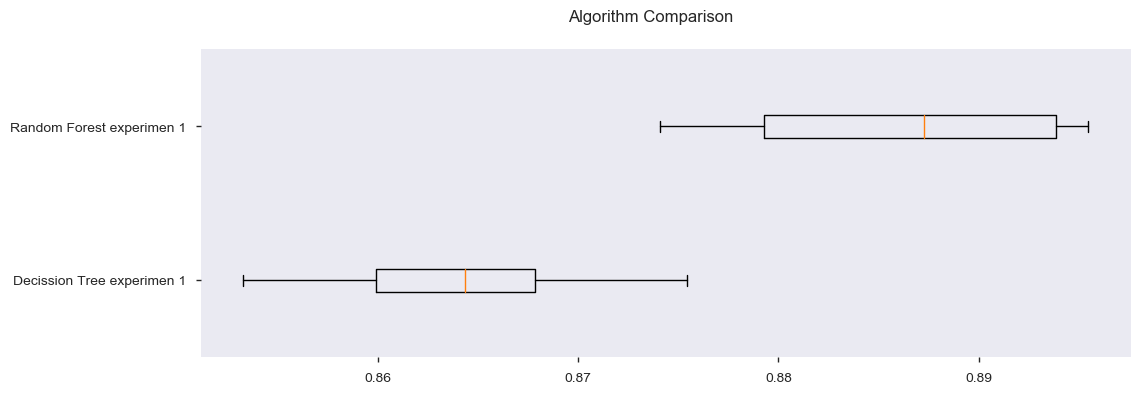

In [27]:
# Compare Algorithms
fig = plt.figure(figsize=(12, 4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, vert=False)
ax.set_yticklabels(names)
plt.grid()
plt.show()

In [28]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train_cl)
y_pred = dtree.predict(X_test)
r = []
r.append([names[0]] + [accuracy_score(y_test_cl, y_pred)])


In [29]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train_cl)
y_pred = rfc.predict(X_test)
r.append([names[1]] + [accuracy_score(y_test_cl, y_pred)])


## Experimen 2 : Data dengan drop null values dengan klasifikasi sebanyak 15 kelas. n = 15.

In [30]:
X, y = df1.iloc[:, df1.columns != 'price'].values, df1.iloc[:, df1.columns == 'price'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 1)

In [31]:
# convert price data to classes
n_classes = 15

y_classes = np.linspace(0, y.max(), n_classes)
y_train_cl = np.digitize(y_train, bins=y_classes)
y_test_cl = np.digitize(y_test, bins=y_classes)

print('Price classes: %s' % (np.round(y_classes)))
# y_classes

Price classes: [     0.   9643.  19286.  28929.  38571.  48214.  57857.  67500.  77143.
  86786.  96429. 106071. 115714. 125357. 135000.]


In [32]:
# evaluate each model in turn
results = []
# names = []
i = 0
for name, model in models:
    kfold = KFold(n_splits=5, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train_cl, cv=kfold)    
    results.append(cv_results)
    names.append(name + ' experimen '+ str(2))
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Decission Tree: 0.806746 (0.014181)
Random Forest: 0.832427 (0.016759)


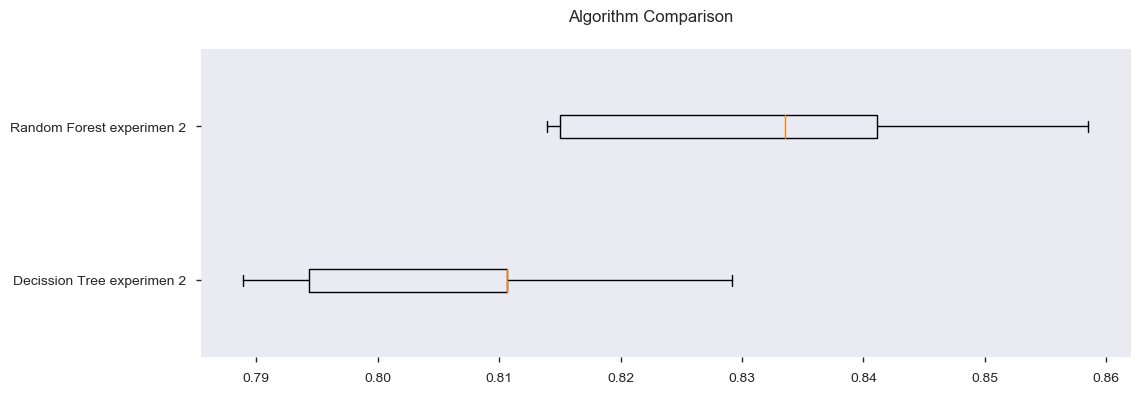

In [33]:
# Compare Algorithms
fig = plt.figure(figsize=(12, 4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, vert=False)
ax.set_yticklabels(names[2:])
plt.grid()
plt.show()

In [34]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train_cl)
y_pred = dtree.predict(X_test)

r.append([names[2]] + [accuracy_score(y_test_cl, y_pred)])


In [35]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train_cl)
y_pred = rfc.predict(X_test)
r.append([names[3]] + [accuracy_score(y_test_cl, y_pred)])


# Evaluasi

In [36]:
pd.DataFrame(r, columns = ['model', 'akurasi'])

,model,akurasi
0,Decission Tree experimen 1,0.861477
1,Random Forest experimen 1,0.885804
2,Decission Tree experimen 2,0.825936
3,Random Forest experimen 2,0.857267


Berikut adalah evaluasi dari hasil permodelan 2 experimen yang saya lakukan.
Dengan hasil experimen 1, dan experimen 2, diperoleh hasil sbb:

### 1) model random forest classifier memiliki akurasi lebih tinggi dibanding decision tree untuk klasifikasi harga mobil bekas. 
### 2) experimen 1 menghasilkan nilai akurasi yang lebih besar daripada experimen 2.
NOTE : data experimen 1 berisi data dengan proses preprocessing yang berbeda dengan experimen 2.
Dimana pada experimen 2 data yang memiliki nilai NULL/NaN maka saya hapus baris tersebut, sedangkan untuk experimen 1 saya ganti dengan nilai mean/modus.

Tentu saja hasil akurasi kedua experimen dan kedua algoritma tersebut dipengaruhi oleh beberapa faktor, yaitu proses preprocessing, data cleaning, remove outlier, handling missing value, dan lain-lain.


# Kesimpulan 

# Pengujian dua buah eksperimen telah selesai dilakukan.
Proses pertama yaitu preprocessing, yang mana proses ini tentu saja sangat krusial untuk memodelkan suatu data.

### 1) Data preparation
Saya menghilangkan beberapa fitur yang tidak diperlukan seperti id, url, region, lat, long dll. Karena asumsi saya fitur tersebut tidak akan mempengaruhi kelas harga dari mobil bekas.
### 2) Data cleaning 
Untuk handling missing value, saya menggunakan 2 teknik, yaitu drop semua nilai NULL dan mengganti nilai NULL dengan mean/median. Terbukti berdasarkan hasil experimen teknik kedua dengan mengganti nilai null menjadi mean/modus meningkatkan nilai akurasi sebesar 0.2%
### 3) Data splitting
Untuk data splitting, saya membagi dataset menjadi 2 bagian. yaitu data train dan data test.
Data train berukuran 80% dan data test berukuran 20% dari jumlah data. Juga dilakukan k-fold cross validation dengan nilai k = 5.
### 4) Data modelling
Saya menggunakan 2 algoritma untuk memodelkan, yaitu Decision Tree dan Random Forest.



Berdasarkan hasil pengujian kedua algoritma, maka diperoleh algoritma yang lebih optimal dalam kasus klasifikasi harga mobil bekas, yaitu algoritma Random Forest Classifier. Tentu saja nilai akurasi tersebut didasarkan dari nilai parameter terbaik masing-masing algoritma. Dataset used cars lebih memiliki kompabalitas terbaik saat dibangun dengan metode berbasis Random Forest dibanding Decision Tree (C4.5)

In [37]:
df.to_csv('data_classification.csv', sep='\t', index=False)

# TASK II [CLUSTERING]

# Problem understanding

Data yang diberikan adalah data mobil bekas, berdasarkan data yang diberikan saya akan membuat clustering data dari beberapa fitur yang akan dicoba pada experimen nanti. Clustering data ini menggunakan algoritma K-means, dan saya akan mencoba beberapa nilai K untuk clustering data mobil bekas ini.

Untuk memproses data algoritma K-means Clustering , data dimulai dengan kelompok pertama centroid yang dipilih secara acak, yang digunakan sebagai titik awal untuk setiap cluster, dan kemudian melakukan perhitungan berulang (berulang) untuk mengoptimalkan posisi centroid.
Proses ini berhenti atau telah selesai dalam mengoptimalkan cluster ketika:
1. Centroid telah stabil, yang artinya tidak ada perubahan dalam nilai-nilai mereka karena pengelompokan telah berhasil.
2. Jumlah iterasi yang ditentukan telah tercapai.

# Data preparation
load data


In [38]:
df2 = df.copy() #menggunakan dataframe dari klasifikasi.
df2

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,17899,2012,37,2136,0,3,2,63500,0,1,0,4,0
2,46463,2015,12,3206,0,5,2,7554,0,0,0,9,10
4,49999,2018,11,1791,0,5,0,70150,0,0,0,8,10
5,13999,2009,31,1713,0,5,2,120057,0,0,0,8,9
6,34500,2017,11,1768,0,5,0,95484,0,0,0,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,24999,2017,34,3914,0,5,2,29894,0,1,0,9,9
19996,49999,2016,31,1333,0,5,0,43406,0,0,0,10,5
19997,12127,2018,28,3164,0,3,2,32867,0,0,1,9,10
19999,14661,2017,36,1230,0,3,2,30486,0,0,1,9,10


###  Dimensional reduction

In [39]:
columns = ['price', 'year', 'odometer']
df2 = df2[columns]
display(df2.head())

,price,year,odometer
0,17899,2012,63500
2,46463,2015,7554
4,49999,2018,70150
5,13999,2009,120057
6,34500,2017,95484


# Visualisasi data awal

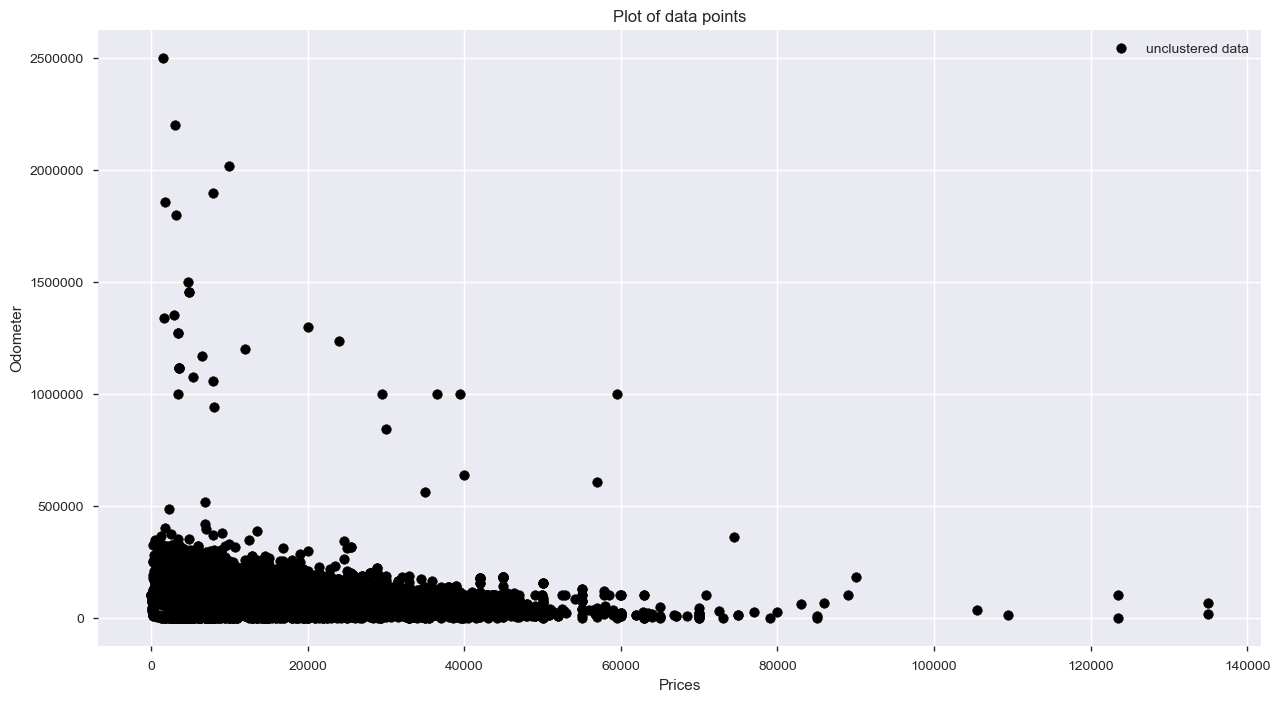

In [40]:
#price, year
data = df2.values

plt.figure(figsize = (15,8))
plt.scatter(data[:,0],data[:,2], c='black',label='unclustered data')
plt.ylabel('Odometer')
plt.xlabel('Prices')
plt.legend()
plt.title('Plot of data points')
plt.show()


## Data Cleaning
Agar penyebaran data lebih variatif, maka kita akan memotong data mobil dengan harga lebih dari 50000, tahun kurang dari 1990, dan odometer lebih dari 60000.

In [41]:
df2 = df2[df2['year'] > 1990]
df2 = df2[df2['price'] < 50000]
df2 = df2[df2['odometer'] < 60000]

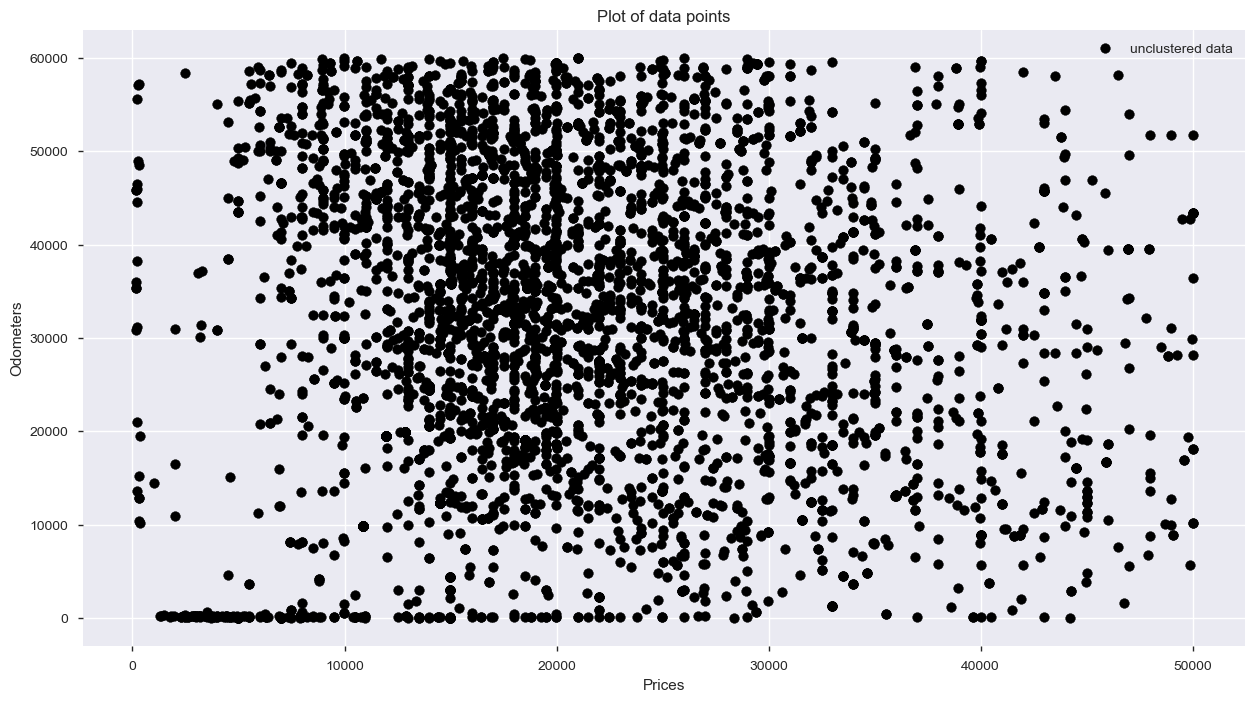

In [42]:
#price, year
data = df2.values

plt.figure(figsize = (15,8))
plt.scatter(data[:,0],data[:,2], c='black',label='unclustered data')
plt.ylabel('Odometers')
plt.xlabel('Prices')
plt.legend()
plt.title('Plot of data points')
plt.show()


## Feature selection
Saya akan menggunakan kolom price, dan year sebagai fitur. Pemilihan ini dikarenakan kedua kolom tersebut memiliki penyebaran data yang banyak sehingga visualisasi clustering akan lebih menarik.

In [43]:
X = df2.iloc[:, [0,2]].values
X

array([[46463,  7554],
       [39995, 23773],
       [ 8300, 28000],
       ...,
       [12127, 32867],
       [14661, 30486],
       [35999, 22078]], dtype=int64)

In [44]:
m=X.shape[0] #Jumlah data
n=X.shape[1] #Jumlah kolom/fitur

# EXPERIMEN 1: Clustering Price & Odometer, K = 3
Parameter K yang akan diinisiasi untuk experimen 1 adalah K = 3.

In [45]:
K = 3
n_iter=100 #jumlah iterasi n untuk mencari centroid yang pas. Jika centroid sudah pas bahkan sebelum iterasi ke-100, maka loop berhenti.

In [46]:
Centroids=np.array([]).reshape(n,0) #iniasiasi centroid awal
Centroids

array([], shape=(2, 0), dtype=float64)

#### Ambil index random dari data sebagai inisiasi centroid awal.

In [47]:
c = []
for i in range(K):
    rand=random.randint(0,m-1) #pick index random untuk centroids.
    Centroids=np.c_[Centroids,X[rand]] #pick random centroid awal
    c.append(X[rand])
Centroids

array([[19500., 30200., 26995.],
       [25861., 32942., 18131.]])

In [48]:
Output={}

Output dari algorima berupa dictionary dengan Cluster number sebagai keys dan Titik data sebagai value.

### Hitung jarak masing-masing centroids 

Hitung jarak masing-masing point data dengan masing-masing centroids, simpan hasilnya ke dalam matrix.

In [49]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1) #Menghitung jarak masing-masing centroid menggunakan Euclidian Distance.
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1 #Mencari nilai minimum dari jarak euclidian distance
C

array([3, 2, 1, ..., 1, 1, 3], dtype=int64)

Ambil jarak minimum data terhadap masing-masing clusters, simpan ke dalam cluster C.

### Perbarui nilai masing-masing centroids, dengan menghitung rata-rata dari semua objek yang ada di cluster C.
Ulangi sampai n_iterations/sampai nilai masing-masing centroids tidak lagi mengalami perubahan.

In [50]:
for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1) #Menghitung jarak Euclidian Distance
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] #Inisiasi matriks euclidian distance
    C=np.argmin(EuclidianDistance,axis=1)+1 #Mencari jarak minimum dan update cluster
    
    Y={} #temp dictionary
    
    for k in range(K):
        Y[k+1]=np.array([]).reshape(n,0)
        
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]  #Inisiasi dictionary untuk setiap data pada masing2 fitur

    for k in range(K):
        Y[k+1]=Y[k+1].T

    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) #Menghitung rata-rata dari objek di setiap cluster dan update centroids.
        
    Output=Y

## Visualisasi data sebelum clustering

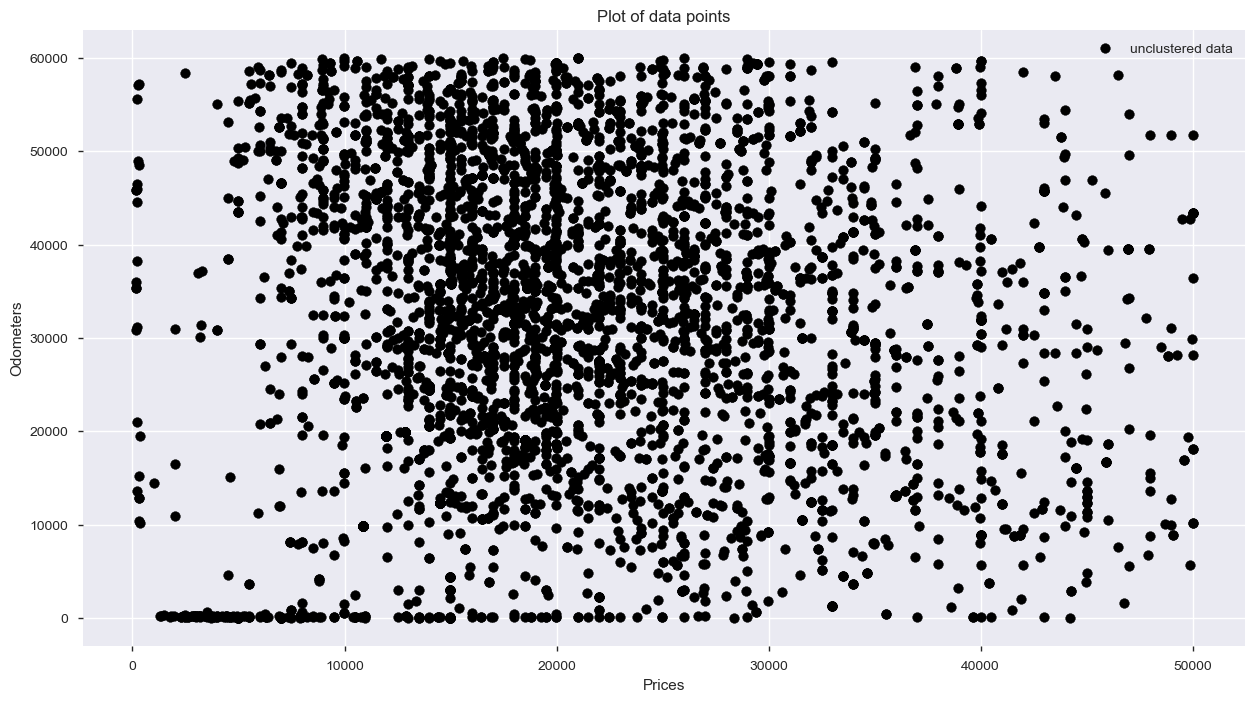

In [51]:
plt.figure(figsize = (15,8))
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Prices')
plt.ylabel('Odometers')
plt.legend()
plt.title('Plot of data points')
plt.show()

## Visualisasi data sesudah clustering (k = 3)

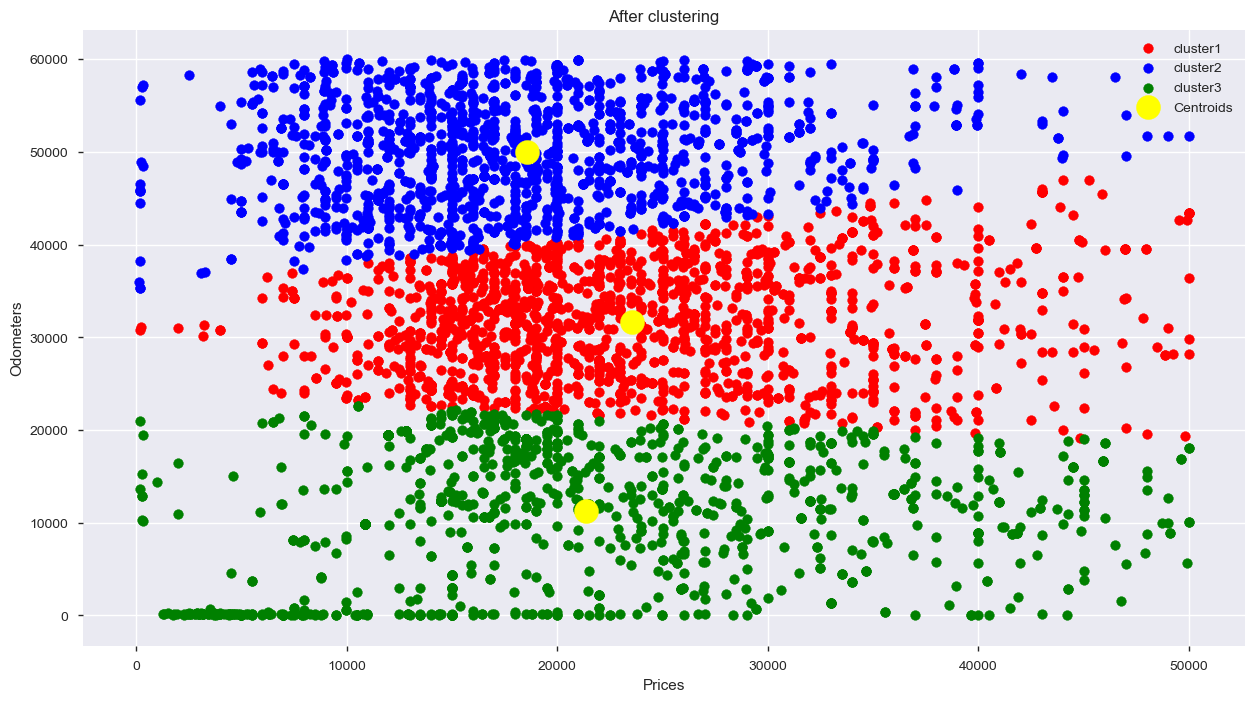

In [52]:
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
plt.figure(figsize = (15,8))
for k in range(K):
    
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Prices')
plt.ylabel('Odometers')
plt.title('After clustering')
plt.legend()
plt.show()

# EXPERIMEN 2: Clustering Price & Odometer, K = 5
Parameter K yang akan diinisiasi untuk experimen 2 adalah K = 5.

In [53]:
X = df2.iloc[:, [0,1]].values
X

array([[46463,  2015],
       [39995,  2016],
       [ 8300,  2016],
       ...,
       [12127,  2018],
       [14661,  2017],
       [35999,  2019]], dtype=int64)

In [54]:
K = 5
n_iter=100 #jumlah iterasi n untuk mencari centroid yang pas. Jika centroid sudah pas bahkan sebelum iterasi ke-100, maka loop berhenti.

In [55]:
Centroids=np.array([]).reshape(n,0) #iniasiasi centroid awal
Centroids

array([], shape=(2, 0), dtype=float64)

#### Ambil index random dari data sebagai inisiasi centroid awal.

In [56]:
c = []
for i in range(K):
    rand=random.randint(0,m-1) #pick index random untuk centroids.
    Centroids=np.c_[Centroids,X[rand]] #pick random centroid awal
    c.append(X[rand])
Centroids

array([[16249., 12995., 22500., 28999., 26999.],
       [ 2017.,  2016.,  2017.,  2018.,  2017.]])

In [57]:
Output={}

Output dari algorima berupa dictionary dengan Cluster number sebagai keys dan Titik data sebagai value.

### Hitung jarak masing-masing centroids 

Hitung jarak masing-masing point data dengan masing-masing centroids, simpan hasilnya ke dalam matrix.

In [58]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1) #Menghitung jarak masing-masing centroid menggunakan Euclidian Distance.
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1 #Mencari nilai minimum dari jarak euclidian distance
C

array([4, 4, 2, ..., 2, 1, 4], dtype=int64)

Ambil jarak minimum data terhadap masing-masing clusters, simpan ke dalam cluster C.

### Perbarui nilai masing-masing centroids, dengan menghitung rata-rata dari semua objek yang ada di cluster C.
Ulangi sampai n_iterations/sampai nilai masing-masing centroids tidak lagi mengalami perubahan.

In [59]:
for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1) #Menghitung jarak Euclidian Distance
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] #Inisiasi matriks euclidian distance
    C=np.argmin(EuclidianDistance,axis=1)+1 #Mencari jarak minimum dan update cluster
    
    Y={} #temp dictionary
    
    for k in range(K):
        Y[k+1]=np.array([]).reshape(n,0)
        
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]  #Inisiasi dictionary untuk setiap data pada masing2 fitur

    for k in range(K):
        Y[k+1]=Y[k+1].T

    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) #Menghitung rata-rata dari objek di setiap cluster dan update centroids.
        
    Output=Y
C

array([4, 4, 2, ..., 1, 1, 4], dtype=int64)

## Visualisasi data sebelum clustering

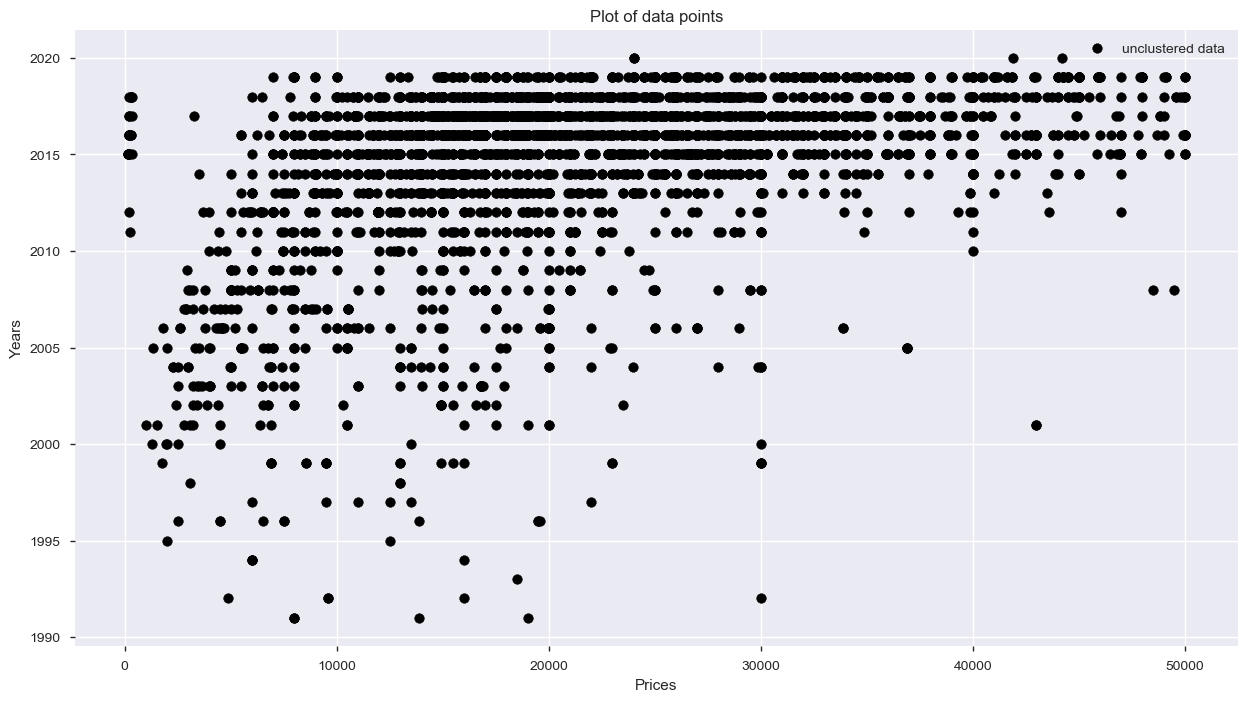

In [60]:
plt.figure(figsize = (15,8))
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Prices')
plt.ylabel('Years')
plt.legend()
plt.title('Plot of data points')
plt.show()

## Visualisasi data sesudah clustering (k = 5)

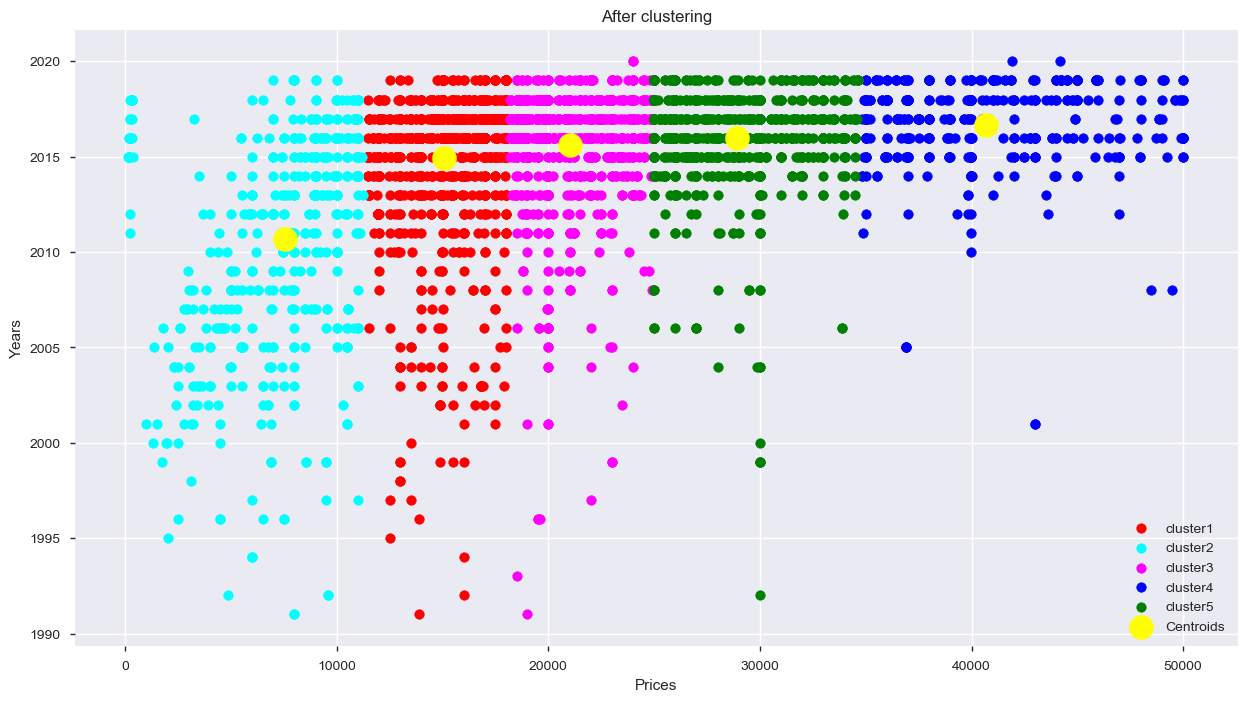

In [61]:
color=['red','cyan','magenta','blue','green']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
plt.figure(figsize = (15,8))
for k in range(K):
    
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.ylabel('Years')
plt.xlabel('Prices')
plt.legend()
plt.title('After clustering')
plt.show()

# Kesimpulan

Visualisasi data berubah menjadi lebih menarik dan informatif. Data yang tadinya adalah unclustered data saya kelompokan ke dalam masing-masing cluster dengan menggunakan algoritma K-means.

### 1) Data preparation
Agar penyebaran data lebih variatif, maka kita akan memotong data mobil dengan harga lebih dari 50000, tahun kurang dari 1990, dan odometer lebih dari 60000.

### 2) Experimen
Dilakukan pengujian algoritma k-means dengan parameter yang berbeda, pada Experimen 1, fitur yang digunakan adalah Price dan Odometer.

Pada experimen 2, fitur yang digunakan adalah Price dan Years.

#### Hasil experimen 1
Terdapat 3 cluster yaitu cluster mobil bekas dengan odometer dibawah 20000, dibawah 40000 dan dibawah 60000 dengan harga masing-masing dari yang termurah sampai termahal.

#### Hasil experimen 2
Terdapat 5 cluster. Bisa kita lihat pada cluster 1. Mobil bekas dengan harga diatas 35000 keluaran tahun 2010 ke atas, ini menandakan cluster 1 merupakan mobil-mobil masih tergolong baru (diatas tahun 2010) maka dari itu harganya pun tergolong masih mahal.

In [62]:
df2.to_csv('data_clustering.csv', sep='\t', index=False)